### Decision Tree Regression

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('medical_insurance.csv')
df2 = df.copy()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df['gender'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [4]:
df['gender'].replace({'male': 1, 'female': 0}, inplace = True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [5]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [8]:
df['smoker'].replace({'no': 0, 'yes': 1}, inplace = True)

In [9]:
df = pd.get_dummies(df, columns=['region'], dtype = int)
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


#### OneHot Encoding

In [10]:
oneHotEnc = OneHotEncoder(sparse_output = False, dtype = int)
encoded_df = pd.DataFrame(oneHotEnc.fit_transform(df2[['region']]), columns = oneHotEnc.get_feature_names_out(['region']))

df2 = pd.concat([df2.drop('region',axis = 1),encoded_df], axis = 1)
df2

KeyError: "None of [Index(['region'], dtype='object')] are in the [columns]"

In [11]:
oneHotEnc.fit_transform(df2[['gender', 'smoker']])
oneHotEnc.get_feature_names_out(['gender', 'smoker'])

array(['gender_female', 'gender_male', 'smoker_no', 'smoker_yes'],
      dtype=object)

In [76]:
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


### Feature Selection

In [13]:
#Embedded Method(After Model Training):
 #   Decision Tree Feature Importance

### Model Training

In [14]:
x = df.drop('charges',axis = 1)
y = df['charges']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)
x_train.shape

(1070, 9)

In [81]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

#### Evalution

In [16]:
# Training Data Evaluation
y_pred_train = dt_reg.predict(x_train)
y_pred_train[35:40]

NameError: name 'dt_reg' is not defined

In [91]:
y_train[35:40]

829      6117.49450
137      2045.68525
1296     1708.92575
760      3925.75820
649     12430.95335
Name: charges, dtype: float64

In [17]:
# Training Data Evaluation
y_pred_train = dt_reg.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

NameError: name 'dt_reg' is not defined

In [99]:
# Testing Data Evaluation
y_pred_test = dt_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-Squared :",r_squared)

MSE : 34137670.95779413
RMSE : 5842.74515598568
MAE : 2688.188401921642
R-Squared : 0.7546596110858765


In [18]:
plt.figure(figsize=(100,90))
plot_tree(dt_reg, feature_names=x.columns, filled=True)
plt.savefig('DT_Reg_without_Hyp.png')

NameError: name 'dt_reg' is not defined

<Figure size 10000x9000 with 0 Axes>

### Hyperparamer Tuning

In [103]:
dt_reg = DecisionTreeRegressor(criterion = 'squared_error',
                              max_depth = 5)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [105]:
# Training Data Evaluation
y_pred_train = dt_reg.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

MSE : 17474476.330445062
RMSE : 4180.248357507609
MAE : 2372.5654310369005
R-Squared : 0.8822284208119401


In [106]:
# Testing Data Evaluation
y_pred_test = dt_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-Squared :",r_squared)

MSE : 20422738.436969727
RMSE : 4519.152402494269
MAE : 2547.724194321208
R-Squared : 0.8532259978423162


In [ ]:
dt_reg = DecisionTreeRegressor()

hyp_grid = {"criterion" : ['squared_error','absolute_error'],
            "max_depth" : range(4,9),
            "min_samples_split" : range(10,20),
            "min_samples_leaf" : range(5,15),
            }

gscv_dt_reg = GridSearchCV(estimator = dt_reg, param_grid = hyp_grid, cv = 4, n_jobs=-1, verbose=1)
gscv_dt_reg.fit(x_train, y_train)

Fitting 4 folds for each of 1000 candidates, totalling 4000 fits


In [145]:
dt_reg = gscv_dt_reg.best_estimator_
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      min_samples_leaf=5, min_samples_split=15)

In [146]:
# Training Data Evaluation
y_pred_train = dt_reg.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

MSE : 19606237.053272035
RMSE : 4427.893071571629
MAE : 1617.7828514570094
R-Squared : 0.8678611332302802


In [147]:
# Testing Data Evaluation
y_pred_test = dt_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-Squared :",r_squared)

MSE : 20743215.721082415
RMSE : 4554.472057339074
MAE : 1851.9259459141792
R-Squared : 0.8509227938065296


In [148]:
plt.figure(figsize=(100,90))
plot_tree(dt_reg, feature_names=x.columns, filled=True)
plt.savefig('DT_Reg_with_Hyp.png')

age                 0.364905
gender              0.004390
bmi                 0.190502
children            0.027708
smoker              0.407948
region_northeast    0.001367
region_northwest    0.002157
region_southeast    0.000739
region_southwest    0.000283
dtype: float64


<Axes: >

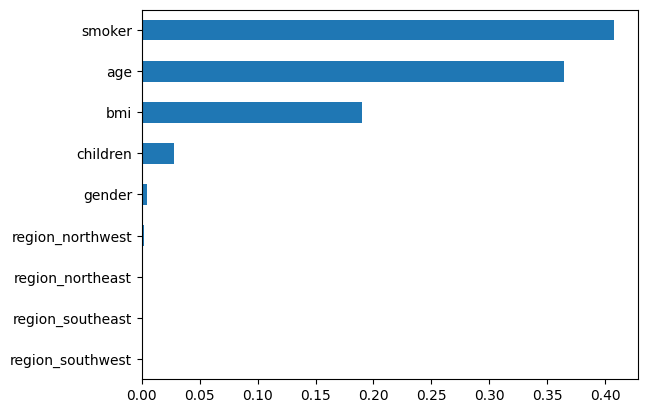

In [152]:
s1 = pd.Series(dt_reg.feature_importances_, index = x.columns)
print(s1)
s1.sort_values().plot(kind = 'barh')

### Pruning

In [142]:
dt_reg = DecisionTreeRegressor()
ccp_alphas = dt_reg.cost_complexity_pruning_path(x_train, y_train)['ccp_alphas'][:-5]
print(ccp_alphas.shape)
training_result_list = []
testing_result_list = []
for i in ccp_alphas:
    dt_reg = DecisionTreeRegressor(ccp_alpha = i)
    dt_reg.fit(x_train, y_train)
    training_result_list.append(dt_reg.score(x_train, y_train))
    testing_result_list.append(dt_reg.score(x_test, y_test))

(916,)


Training Data Accuracy: 0.8972880932115113
Testing Data Accuracy: 0.8518403190103292


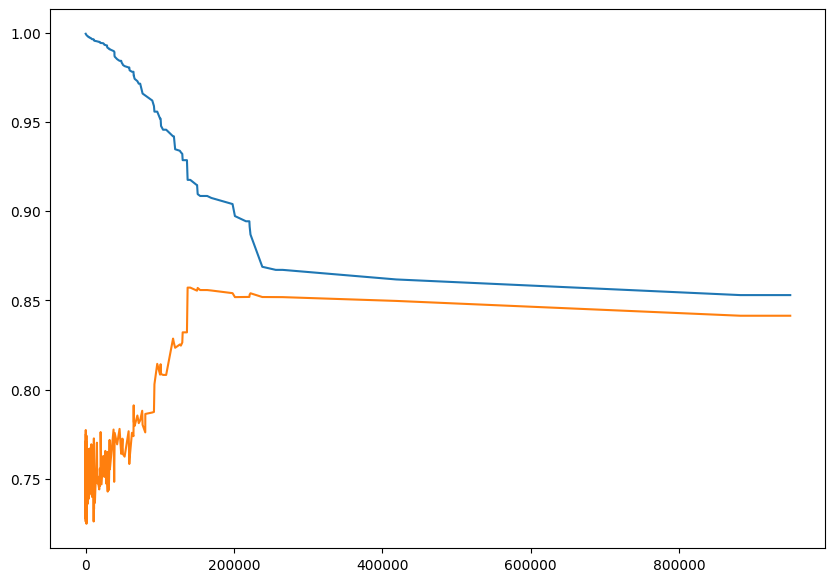

In [144]:
plt.figure(figsize=(10,7))
plt.plot(ccp_alphas,training_result_list)
plt.plot(ccp_alphas,testing_result_list)
plt.savefig("CCP Alphas")

max_val_index = np.argmax(testing_result_list) + 9
print("Training Data Accuracy:", training_result_list[max_val_index])
print("Testing Data Accuracy:", testing_result_list[max_val_index])

### Conclusion

In [ ]:
Pruning:
    Training Data Accuracy: 0.8913995203893409
    Testing Data Accuracy: 0.8531974927510773

Hyperparameter Tuning:
    Training Data Accuracy: 0.8678611332302802
    Testing Data Accuracy: 0.8509227938065296
